<a href="https://colab.research.google.com/github/rtajeong/Hallym_univ_M34/blob/main/hallym_lab01_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy 연습

In [ ]:
import numpy as np

## method 1 - c-style code

In [ ]:
N = 100000
x = np.random.rand(N)   # uniform random number in (0,1)
y = np.random.rand(N)
cnt = 0
for i in range(N):
  if x[i]**2 + y[i]**2 < 1.0:
    cnt += 1
  else:
    continue
pi = cnt/N * 4
print(pi)

3.14528


## method 2 - python style

In [ ]:
N = 10
x = np.random.rand(N) 
y = np.random.rand(N)

In [ ]:
x.round(2), y.round(2)

(array([0.99, 0.22, 0.25, 0.75, 0.58, 0.92, 0.56, 0.48, 0.45, 0.75]),
 array([0.3 , 0.98, 0.8 , 0.77, 0.2 , 0.43, 0.85, 0.12, 0.25, 0.45]))

In [ ]:
x**2, y**2

(array([0.97701498, 0.04852492, 0.0607614 , 0.55618185, 0.33995878,
        0.84375887, 0.31903243, 0.22905773, 0.20337476, 0.56265046]),
 array([0.08835363, 0.95384955, 0.63382269, 0.59417834, 0.03948562,
        0.18453433, 0.71607795, 0.01530881, 0.0625175 , 0.2041435 ]))

In [ ]:
x**2 + y**2

array([1.06536861, 1.00237447, 0.69458408, 1.15036018, 0.3794444 ,
       1.0282932 , 1.03511038, 0.24436654, 0.26589226, 0.76679396])

In [ ]:
x**2 + y**2 < 1.0

array([False, False,  True, False,  True, False, False,  True,  True,
        True])

In [ ]:
(x**2 + y**2 < 1.0).sum()

5

In [ ]:
(x**2 + y**2 < 1.0).sum()/N * 4

2.0

In [ ]:
# 코드 전체
N = 300
x = np.random.rand(N) 
y = np.random.rand(N)
print("pi is: ", (x**2 + y**2 < 1.0).sum()/N * 4)

pi is:  3.1333333333333333


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

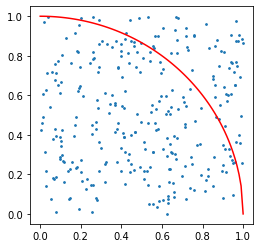

In [ ]:
plt.figure(figsize=(4,4))
plt.scatter(x, y, s=3)

a = np.linspace(-0,1, 100)
b = (1 - a**2)**0.5
plt.plot(a, b, c='r')

# Gradient Descent method for Linear Regression

In [ ]:
n = 100
x = np.random.randn(n)
y = 0.7 * x + 0.7     # w=0.7, b=0.7
y = y + np.random.randn(n) * 0.5
plt.scatter(x, y)
w = np.random.randn()
b = np.random.randn()

lr = 0.01
n_epoch = 200
lossHistory = []

for i in range(n_epoch):
  y_pred = w * x + b
  loss = ((y_pred - y)**2).mean()

  w = w - lr * 2 * ((y_pred - y) * x).mean()
  b = b - lr * 2 * (y_pred - y).mean()
  lossHistory.append(loss)

  if (i % 10 ==0) : 
    print(w, b, loss)

# graph
xx = np.linspace (-3, 5, 100)
yy = xx * w + b
plt.plot(xx, yy, c='r')

In [ ]:
plt.plot(lossHistory)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x.reshape(-1,1), y)
model.coef_, model.intercept_

(array([0.70563189]), 0.6795470752380733)

# Gradient Descent method for Linear Classification
- Logistic Regression

0.9833333333333333


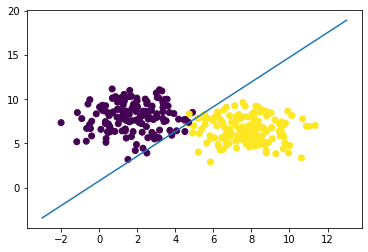

In [ ]:
from sklearn.datasets import make_blobs
N = 300
np.random.seed(17)
(X, y) = make_blobs(n_samples=N, n_features=2, centers=2,
                     cluster_std=1.5, random_state=20)
plt.scatter(X[:,0], X[:,1], c=y)
x1, x2 = X[:,0], X[:,1]

w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

def sigmoid(x):
  return 1.0/(1.0 + np.exp(-x))

lossHistory = []
n_epoch = 300
lr = 0.01

for i in range(n_epoch):
  z = w1 * x1 + w2 * x2 + b
  y_pred = sigmoid(z)
  loss = -(y*np.log(y_pred)+(1-y)*np.log(1-y_pred)).mean()
  lossHistory.append(loss)

  w1 = w1 - lr * ((y_pred - y) * x1).mean()
  w2 = w2 - lr * ((y_pred - y) * x2).mean()
  b  = b  - lr * ((y_pred - y) * 1 ).mean()

  # if (i % 30 ==0) : 
  #  print(w1, w2, b, loss)

accuracy = ((sigmoid(w1*x1 + w2*x2 + b) > 0.5) == y).mean()
print(accuracy)

# plotting
xx = np.linspace(-3, 13, 100)
yy = -w1/w2 * xx - b/w2
plt.plot(xx, yy)

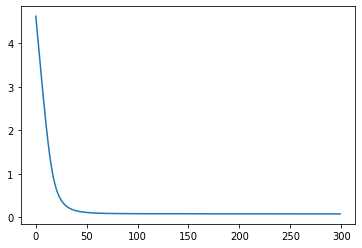

In [ ]:
plt.plot(lossHistory)

In [ ]:
# using Library function
from sklearn.linear_model import SGDClassifier, LogisticRegression

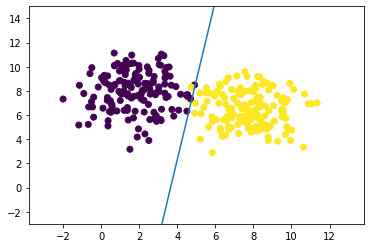

In [ ]:
N = 300
np.random.seed(17)
(X, y) = make_blobs(n_samples=N, n_features=2, centers=2,
                     cluster_std=1.5, random_state=20)
plt.scatter(X[:,0], X[:,1], c=y)
x1, x2 = X[:,0], X[:,1]

model = LogisticRegression()
model.fit(X, y)
model.coef_, model.intercept_

plt.ylim([-3, 15])
w1, w2, b = model.coef_[0,0], model.coef_[0,1], model.intercept_[0]
xx = np.linspace(-3, 13, 100)
yy = -w1/w2 * xx - b/w2
plt.plot(xx, yy)

In [ ]:
model.score(X, y)

0.9933333333333333